#          Project_EDWISOR ====> Bike Renting

In [188]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [189]:
# To read data from excel file
data = pd.read_csv('E:\DS Courses\Edwisor\Project 2\day.csv')
print('No.of rows = ' + format(data.shape[0]))
print('No. of columns = ' + format(data.shape[1]))
data.head()

No.of rows = 731
No. of columns = 16


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [190]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Missing Values

The count of all the attributes in the above cell is 731. This shows that there are no values missing.

In the next cell, the same has been verified. There is no need for further missing value analysis.

In [191]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Updating the Attributes

temp: Normalized temperature in Celsius. The values are derived via
(t-t_min)/(t_max-t_min),
t_min=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via
(t-t_min)/(t_maxt_
min), t_min=-16, t_max=+50 (only in hourly scale)
hum: Normalized humidity. The values are divided to

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

We will also add a new attribute with the mean of the two temperatures

In [192]:
data.temp = data.temp *(39-(-8))+(-8)
data.atemp = data.atemp*(50-(-16))+(-16)

data.hum = data.hum*100
data.windspeed = data.windspeed*67

In [193]:
# As we have two different temperature with a slight difference, I will be using a new temperature variable
# This variable will be derived by calculating the mean of the 'temperature' and 'feeling temperature'
data['avtemp'] = (data.temp + data.atemp)/2
data = data[['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp','avtemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']]

## Catagorical Data

In [194]:
# Since the number of rows where 'holiday = 0' is 710 and 21 for 'holiday = 1'
# It can easily be interpreted that the 0 represents a working day and 1 represents a non working day

print(data[data.holiday == 0].shape[0])
print(data[data.holiday == 1].shape[0])



data.replace({'holiday' : 0}, 'generic', inplace=True)
data.replace({'holiday' : 1}, 'holiday', inplace= True)

710
21


In [195]:
# Converting the variable season

all_season = ['Spring','Summer','Fall', 'Winter']

for i in range(len(all_season)):
    data.replace({'season': i+1} ,all_season[i], inplace = True)

# Converting yr
data.replace({'yr' : 0}, '2011', inplace= True)
data.replace({'yr' : 1}, '2012', inplace= True)    

# Converting month
all_months = ['January', 'February', 'March','April','May','June','July','August','September','October','November','December'] 
for i in range(len(all_months)): 
    data.replace({'mnth': i+1} ,all_months[i], inplace = True) 

    
# Converting weather situation
data.replace({'weathersit': 1}, 'Pleasant', inplace = True)
data.replace({'weathersit': 2}, 'Moderate', inplace = True)
data.replace({'weathersit': 3}, 'Bad', inplace = True)
data.replace({'weathersit': 4}, 'Extreme', inplace = True)

# Checked Calender details of 2011.
# The year starts with Saturday where date is 1/1/2011. Dataset represents this date by '6'
# It can be interpreted as the weekday starts with Sunday represented by '0'
# Converting the variable w_day

all_wday = ['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
for i in range(len(all_wday)):
    data.replace({'weekday': i}, all_wday[i], inplace = True)
    

In [196]:

# 0 It can be a week off or a holidy.
# 1 is neither weekend nor holiday. Hence it is working day

data.replace({'workingday': 0}, 'day off', inplace = True)
data.replace({'workingday': 1}, 'working', inplace = True)
    
    

In [197]:
# This shows that the holiday is not overlapping with weekend offs(Saturday, Sunday)
# This shows any given day is either 'working' or 'week off' or 'holiday'. None of these are overlapping with any other.

print('Favourable days on holidays are '+ format(data[data.holiday == 'holiday'].weekday.unique()) )
print('Favourable generic days are ' + format(data[data.holiday == 'generic'].weekday.unique()))

Favourable days on holidays are ['Monday' 'Friday' 'Thursday' 'Wednesday' 'Tuesday']
Favourable generic days are ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


The above code cell tells us that there is no overlap between holiday and week-offs. Holidays, working days and weekoffs(Sat Sun) are independent of each other

## Data Distribution

### Distribution of target variable 'cnt' representing the total number of bikes rented on a given day

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


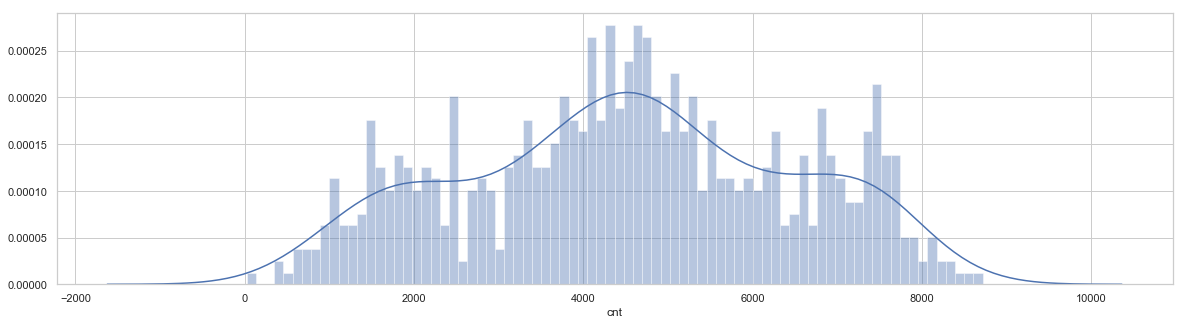

In [198]:
# The distribution of this variabe is almost normal
f, ax = plt.subplots(figsize= (20,5))
sns.distplot(data.cnt, bins= 80)

### Distribution of other continuous variables

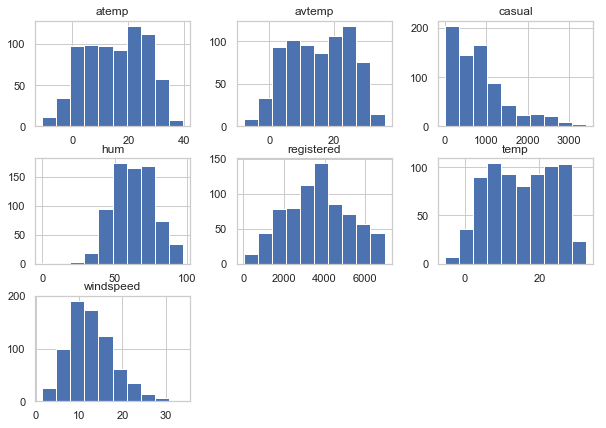

In [199]:
data[['temp','atemp','avtemp','windspeed','registered','casual','hum']].hist(figsize= (10,7))
plt.show()

###  Distribution of Catagorical variables

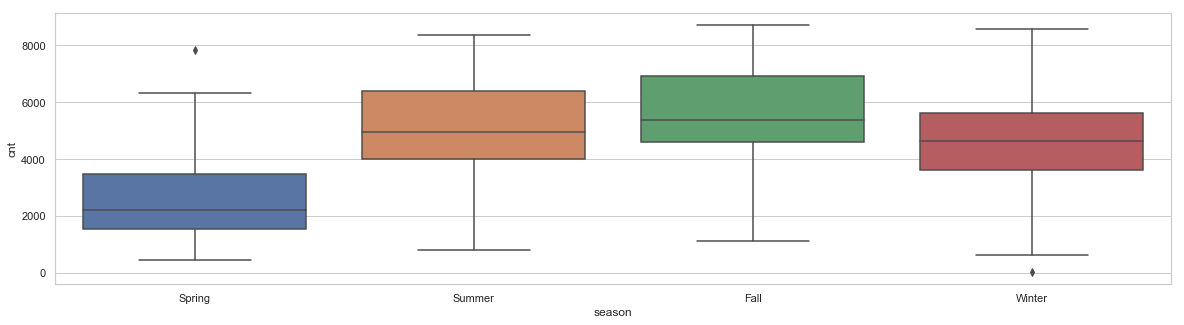

In [200]:
fig = plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.boxplot(x="season", y="cnt", data=data)

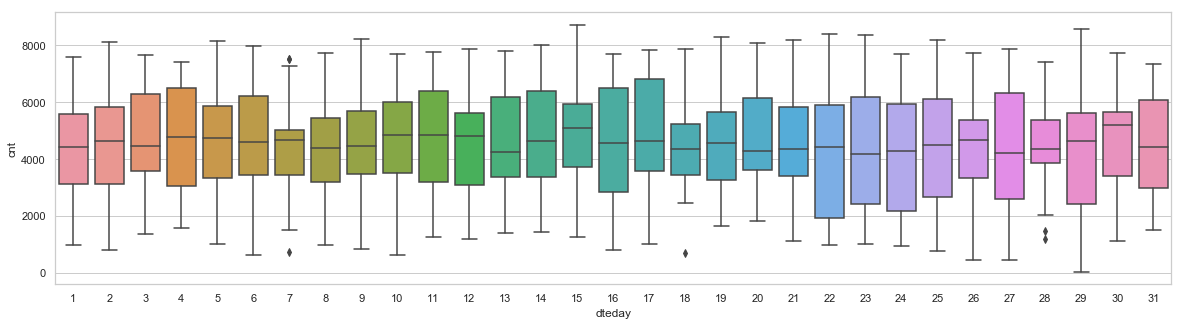

In [201]:
df = data
df['dteday'] = pd.DatetimeIndex(df['dteday']).day
fig = plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.boxplot(x="dteday", y="cnt", data=df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


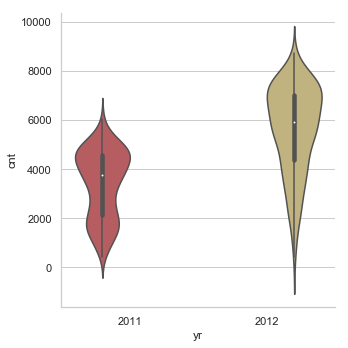

In [202]:
sns.catplot(x="yr", y= 'cnt', kind = 'violin', data=data,hue = 'yr', palette= {'2011':'r','2012': 'y'})

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


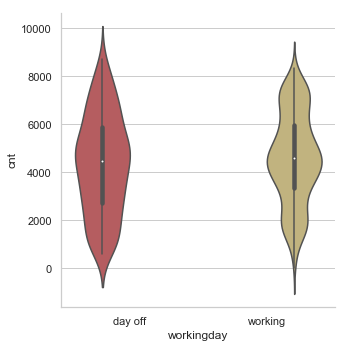

In [203]:
sns.catplot(x="workingday", y= 'cnt', kind = 'violin', data=data,hue = 'workingday', palette= {'day off':'r','working': 'y'})

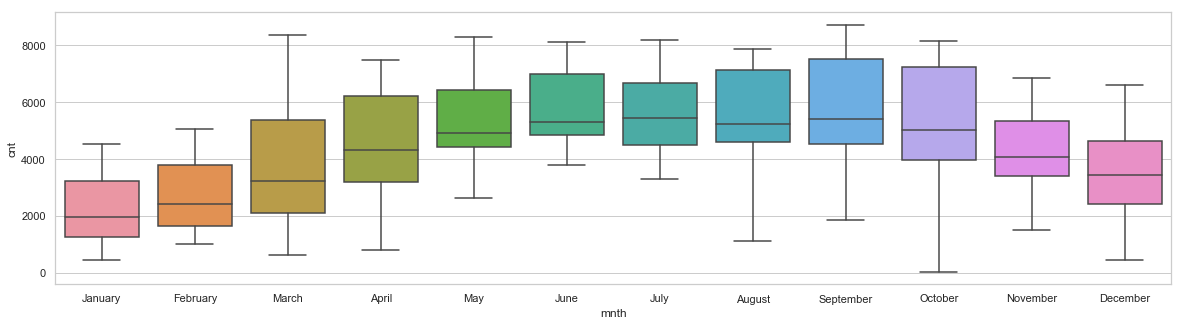

In [204]:
fig = plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.boxplot(x="mnth", y="cnt", data=data)

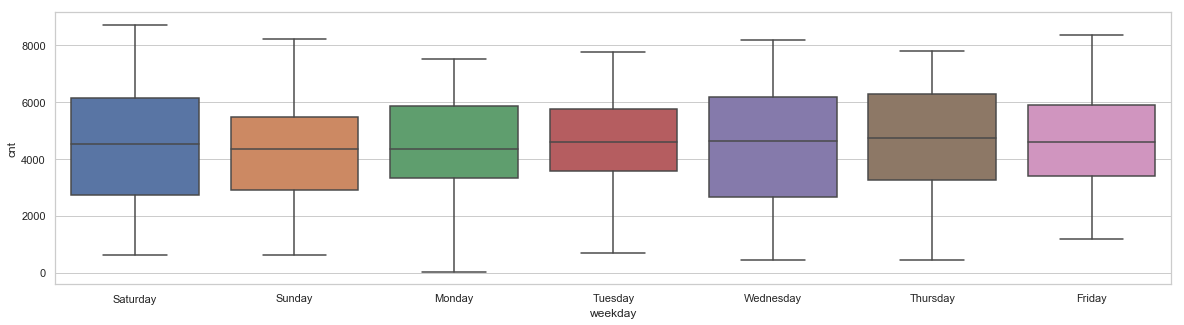

In [205]:
fig = plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.boxplot(x="weekday", y="cnt", data=data)

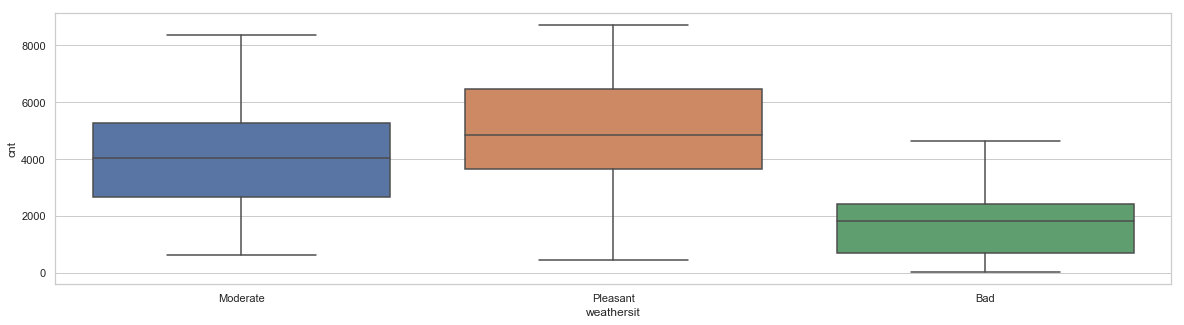

In [206]:
fig = plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.boxplot(x="weathersit", y="cnt", data=data)

## Outlier Analysis

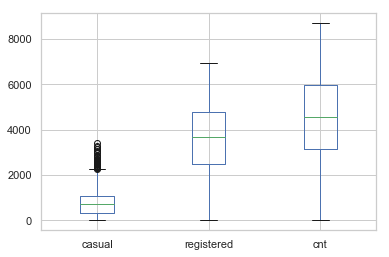

In [207]:
boxplot = data.boxplot(column=['casual','registered','cnt'])

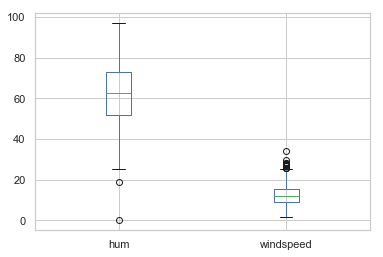

In [208]:
boxplot = data.boxplot(column=['hum','windspeed'])

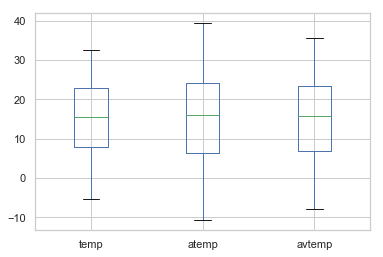

In [209]:
boxplot = data.boxplot(column=['temp', 'atemp','avtemp'])

In [210]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'avtemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

#  CORRELATION

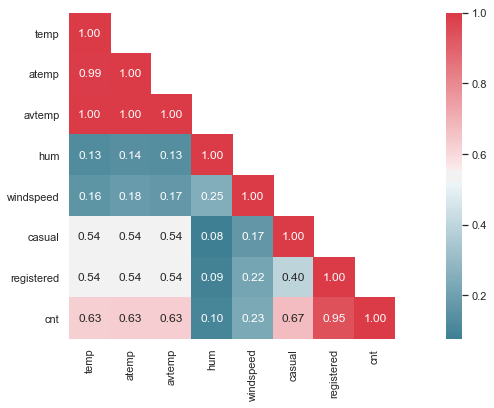

In [211]:
con = ['temp', 'atemp','avtemp', 'hum', 'windspeed', 'casual', 'registered','cnt']

df_con = data.loc[:,con]

f, ax = plt.subplots(figsize=(18,6))
corr = df_con.corr().abs()

# Select upper triangle of correlation matrix
lower = corr.where(np.tril(np.ones(corr.shape), k=0).astype(np.bool))

sns.heatmap(lower,mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220,10,as_cmap = True), square = True, annot=True, fmt=".2f", ax = ax)
plt.show()

# Feature Scaling

### MinMax Scaling

In [212]:
df = data
df.avtemp = (df.avtemp-(df.avtemp.min()))/((df.avtemp.max())-(df.avtemp.min()))
df.dteday = df.dteday.astype('object')
#df.hum = (df.hum-(df.hum.min()))/((df.hum.max())-(df.hum.min()))
#df.windspeed = (df.windspeed-(df.windspeed.min()))/((df.windspeed.max())-(df.windspeed.min()))

# Model Building

In [213]:
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [214]:
df = df[['dteday', 'season', 'yr','mnth', 'holiday', 'weekday','workingday', 'weathersit','avtemp', 'hum','windspeed','cnt']]

In [215]:
dfo = df
dfo_target = data['cnt']

# drop target variable from dataset
dfo = data.drop(['cnt'], axis=1)



# save all categorical columns in list
categorical_columns = [col for col in df.columns.values if df[col].dtype == 'object']
# dataframe with categorical features
dfo_cat = df[categorical_columns]
# dataframe with numerical features
dfo_num = df.drop(categorical_columns, axis=1)
dfo_num = dfo_num.drop('cnt', axis = 1)
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
dfo_cat_dummies = pd.get_dummies(dfo_cat,drop_first=True)

# using concat function we merging two dataframe for furthere analysis
newdata = pd.concat([dfo_num, dfo_cat_dummies], axis=1)

#Let us now split the dataset into train & test
from sklearn.cross_validation import train_test_split
m_train,m_test, n_train, n_test = train_test_split(newdata, dfo_target, test_size = 0.30, random_state=0)
print("m_train ",m_train.shape)
print("m_test ",m_test.shape)
print("n_train ",n_train.shape)
print("n_test ",n_test.shape)

#******************BASE MODEL******************
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm
# Building Linear Regression model using OLS
model1 = sm.OLS(n_train, m_train).fit()
# Note the Swap of X and Y
# Printing Linear Regression Summary

model1.summary()

m_train  (511, 58)
m_test  (220, 58)
n_train  (511,)
n_test  (220,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     45.05
Date:                Wed, 21 Nov 2018   Prob (F-statistic):          1.42e-152
Time:                        02:29:20   Log-Likelihood:                -4096.2
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     453   BIC:                             8554.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
avtemp               3839.2535    417.735      9.191      0.000    3018.314    4660.193
hum                   -17.2159      3.889     -4.427      0.000     -24.858      -9.574
windspeed             -49.9462      7.710     -6.478      0.000     -65.098     -34.795
dteday_2              280.9040    277.907      1.011      0.313    -265.244     827.052
dteday_3              412.2808    277.297      1.487      0.138    -132.667     957.229
dteday_4              536.2154    291.850      1.837      0.067     -37.333    1109.764
dteday_5              409.5157    275.331      1.487      0.138    -131.570     950.601
dteday_6              587.4792    264.393      2.222      0.027      67.891    1107.067
dteday_7              500.8343    289.383      1.731      0.084     -67.866    1069.534
dteday_8              239.5056    270.566      0.885      0.377    -292.215     771.226
dteday_9              509.5156    266.539      1.912      0.057     -14.291    1033.323
dteday_10             333.3732    284.994      1.170      0.243    -226.701     893.447
dteday_11             588.1354    271.099      2.169      0.031      55.368    1120.903
dteday_12             480.9986    264.278      1.820      0.069     -38.364    1000.361
dteday_13             559.1218    289.657      1.930      0.054     -10.117    1128.360
dteday_14             518.9972    267.690      1.939      0.053      -7.071    1045.066
dteday_15             438.1622    279.668      1.567      0.118    -111.446     987.771
dteday_16             419.9288    268.982      1.561      0.119    -108.679     948.537
dteday_17             830.0566    261.280      3.177      0.002     316.585    1343.528
dteday_18             331.9895    283.595      1.171      0.242    -225.335     889.315
dteday_19             372.6323    289.523      1.287      0.199    -196.343     941.607
dteday_20             531.1501    282.233      1.882      0.060     -23.498    1085.799
dteday_21             369.7247    280.436      1.318      0.188    -181.393     920.842
dteday_22             226.8669    277.745      0.817      0.414    -318.962     772.696
dteday_23             153.9125    263.942      0.583      0.560    -364.791     672.616
dteday_24            -101.7312    284.331     -0.358      0.721    -660.503     457.041
dteday_25              28.6978    296.274      0.097      0.923    -553.545     610.940
dteday_26             418.4833    266.259      1.572      0.117    -104.773     941.740
dteday_27             297.1961    279.358      1.064      0.288    -251.802     846.194
dteday_28             210.8970    284.160      0.742      0.458    -347.538     769.332
dteday_29             -27.8968    287.304     -0.097      0.923    -592.512     536.718
dteday_30              44.6375    284.901      0.157      0.876    -515.254     604.528
dte

In [216]:
def rmse(predictions, targets):
    differences = predictions - targets # the DIFFERENCEs.
    differences_squared = differences ** 2 # the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean() # the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared) # ROOT of ^
    return rmse_val

cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)
# Predicting the model on test data
predictions1 = model1.predict(m_test)


tmp1 = pd.Series({'Model': " Base Linear Regression Model",
'R-Squared Value' : model1.rsquared,
'Adj.R-Squared Value': model1.rsquared_adj,
'RMSE': rmse(predictions1, n_test)})
model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.850045,0.831177,788.533184


In [217]:
# Adding connstant
dfo_constant = sm.add_constant(newdata)

m_train1,m_test1, n_train1, n_test1 = train_test_split(dfo_constant, dfo_target, test_size = 0.30, random_state=0)

# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm
# Building Linear Regression model using OLS
model2 = sm.OLS(n_train1, m_train1).fit()
# Note the Swap of X and Y

# Printing Linear Regression Summary
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                  OLS                Adj. R-squared:       0.831     
Dependent Variable:     cnt                AIC:                  8308.4925 
Date:                   2018-11-21 02:56   BIC:                  8554.2019 
No. Observations:       511                Log-Likelihood:       -4096.2   
Df Model:               57                 F-statistic:          45.05     
Df Residuals:           453                Prob (F-statistic):   1.42e-152 
R-squared:              0.850              Scale:                6.0615e+05
---------------------------------------------------------------------------
                      Coef.    Std.Err.    t    P>|t|    [0.025     0.975] 
---------------------------------------------------------------------------
const                1151.5804 466.7238  2.4674 0.0140   234.3680 2068.7928
avtemp               3839.2535 417.7354  9.1906 0.0000  3018.3139 4660.1932
hum                   -17.2159   3.8886 -4.4272 0.0000   -24.8579   -9.5739
windspeed             -49.9462   7.7098 -6.4783 0.0000   -65.0977  -34.7948
dteday_2              280.9040 277.9075  1.0108 0.3127  -265.2438  827.0519
dteday_3              412.2808 277.2970  1.4868 0.1378  -132.6674  957.2289
dteday_4              536.2154 291.8504  1.8373 0.0668   -37.3333 1109.7642
dteday_5              409.5157 275.3315  1.4874 0.1376  -131.5698  950.6012
dteday_6              587.4792 264.3926  2.2220 0.0268    67.8911 1107.0674
dteday_7              500.8343 289.3831  1.7307 0.0842   -67.8656 1069.5342
dteday_8              239.5056 270.5660  0.8852 0.3765  -292.2148  771.2259
dteday_9              509.5156 266.5393  1.9116 0.0566   -14.2912 1033.3225
dteday_10             333.3732 284.9937  1.1698 0.2427  -226.7006  893.4470
dteday_11             588.1354 271.0988  2.1695 0.0306    55.3681 1120.9026
dteday_12             480.9986 264.2778  1.8200 0.0694   -38.3641 1000.3613
dteday_13             559.1218 289.6573  1.9303 0.0542   -10.1169 1128.3604
dteday_14             518.9972 267.6901  1.9388 0.0531    -7.0712 1045.0656
dteday_15             438.1622 279.6684  1.5667 0.1179  -111.4462  987.7706
dteday_16             419.9288 268.9825  1.5612 0.1192  -108.6795  948.5370
dteday_17             830.0566 261.2802  3.1769 0.0016   316.5850 1343.5282
dteday_18             331.9895 283.5950  1.1706 0.2424  -225.3355  889.3145
dteday_19             372.6323 289.5230  1.2871 0.1987  -196.3426  941.6071
dteday_20             531.1501 282.2331  1.8820 0.0605   -23.4985 1085.7986
dteday_21             369.7247 280.4364  1.3184 0.1880  -181.3929  920.8424
dteday_22             226.8669 277.7453  0.8168 0.4145  -318.9623  772.6960
dteday_23             153.9125 263.9423  0.5831 0.5601  -364.7908  672.6159
dteday_24            -101.7312 284.3314 -0.3578 0.7207  -660.5034  457.0411
dteday_25              28.6978 296.2742  0.0969 0.9229  -553.5446  610.9402
dteday_26             418.4833 266.2591  1.5717 0.1167  -104.7730  941.7396
dteday_27             297.1961 279.3576  1.0639 0.2880  -251.8015  846.1938
dteday_28             210.8970 284.1597  0.7422 0.4584  -347.5376  769.3317
dteday_29             -27.8968 287.3044 -0.0971 0.9227  -592.5115  536.7180
dteday_30              44.6375 284.9007  0.1567 0.8756  -515.2535  604.5285
dteday_31             693.8470 322.2726  2.1530 0.0318    60.5122 1327.1818
season_Spring       -1102.8355 265.9861 -4.1462 0.0000 -1625.5552 -580.1157
season_Summer        -202.3008 217.9330 -0.9283 0.3538  -630.5860  225.9843
season_Winter         470.3750 259.0767  1.8156 0.0701   -38.7664  979.5164
yr_2012              1925.0260  72.4479 26.5712 0.0000  1782.6503 2067.4017
mnth_August          -227.3648 288.8099 -0.7872 0.4315  -794.9383  340.2087
mnth_December        -442.9947 302.2209 -1.4658 0.1434 -1036.9237  150.9342
mnth_February        

In [40]:
# Predicting the model on test data
predictions2 = model2.predict(m_test1)
tmp2 = pd.Series({'Model': " Linear Regression Model with Constant",
'R-Squared Value' : model2.rsquared,
'Adj.R-Squared Value': model2.rsquared_adj,
'RMSE': rmse(predictions2, n_test1)})
model2_report = models_report.append(tmp2, ignore_index = True)
model2_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Linear Regression Model with Constant,0.850045,0.831177,788.533184


In [218]:
# *** Removing the variables with p-values greater than 0.05
# using concat function we merging two dataframe for furthere analysis
newdata = newdata[['avtemp', 'hum', 'windspeed','dteday_6','dteday_11', 
       'dteday_17','dteday_31', 'season_Spring','yr_2012', 'mnth_July','weekday_Saturday',
       'workingday_working', 'weathersit_Moderate', 'weathersit_Pleasant']]

#Let us now split the dataset into train & test
from sklearn.cross_validation import train_test_split
m_train,m_test, n_train, n_test = train_test_split(newdata, dfo_target, test_size = 0.30, random_state=0)
print("m_train ",m_train.shape)
print("m_test ",m_test.shape)
print("n_train ",n_train.shape)
print("n_test ",n_test.shape)

#******************BASE MODEL******************
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm
# Building Linear Regression model using OLS
model3 = sm.OLS(n_train, m_train).fit()
# Note the Swap of X and Y
# Printing Linear Regression Summary

model3.summary()


m_train  (511, 14)
m_test  (220, 14)
n_train  (511,)
n_test  (220,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1223.
Date:                Wed, 21 Nov 2018   Prob (F-statistic):               0.00
Time:                        02:56:43   Log-Likelihood:                -4152.3
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     497   BIC:                             8392.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
avtemp               3818.4013    235.312     16.227      0.000    3356.073    4280.729
hum                    -4.3544      2.407     -1.809      0.071      -9.083       0.374
windspeed             -37.6088      6.650     -5.655      0.000     -50.675     -24.543
dteday_6              281.2442    186.418      1.509      0.132     -85.021     647.509
dteday_11             334.9105    199.973      1.675      0.095     -57.986     727.807
dteday_17             461.3327    185.953      2.481      0.013      95.982     826.683
dteday_31             252.8324    267.025      0.947      0.344    -271.805     777.470
season_Spring       -1249.3930    109.085    -11.453      0.000   -1463.718   -1035.068
yr_2012              1993.3010     73.930     26.962      0.000    1848.047    2138.555
mnth_July            -644.6542    155.375     -4.149      0.000    -949.927    -339.382
weekday_Saturday      374.4482    133.055      2.814      0.005     113.028     635.868
workingday_working    304.7202     98.991      3.078      0.002     110.229     499.212
weathersit_Moderate  1997.4827    185.276     10.781      0.000    1633.463    2361.503
weathersit_Pleasant  2492.8733    164.580     15.147      0.000    2169.515    2816.232
==============================================================================
Omnibus:                       42.972   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.064
Skew:                          -0.513   Prob(JB):                     9.18e-19
Kurtosis:                       4.688   Cond. No.                         513.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
# Predicting the model on test data
predictions3 = model3.predict(m_test)
tmp2 = pd.Series({'Model': " Linear Regression Model with selected features",
'R-Squared Value' : model3.rsquared,
'Adj.R-Squared Value': model3.rsquared_adj,
'RMSE': rmse(predictions3, n_test)})
model3_report = models_report.append(tmp2, ignore_index = True)
model3_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Linear Regression Model with selected features,0.971792,0.970998,802.513293


In [220]:
# *** Removing the variables with p-values greater than 0.05
# using concat function we merging two dataframe for furthere analysis
newdata = newdata[['avtemp', 'windspeed','dteday_17', 'season_Spring','yr_2012', 'mnth_July','weekday_Saturday',
       'workingday_working', 'weathersit_Moderate', 'weathersit_Pleasant']]

#Let us now split the dataset into train & test
from sklearn.cross_validation import train_test_split
m_train,m_test, n_train, n_test = train_test_split(newdata, dfo_target, test_size = 0.30, random_state=0)
print("m_train ",m_train.shape)
print("m_test ",m_test.shape)
print("n_train ",n_train.shape)
print("n_test ",n_test.shape)

#******************BASE MODEL******************
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm
# Building Linear Regression model using OLS
model4 = sm.OLS(n_train, m_train).fit()
# Note the Swap of X and Y
# Printing Linear Regression Summary

model4.summary()


m_train  (511, 10)
m_test  (220, 10)
n_train  (511,)
n_test  (220,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1696.
Date:                Wed, 21 Nov 2018   Prob (F-statistic):               0.00
Time:                        02:56:53   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
avtemp               3643.6944    213.308     17.082      0.000    3224.607    4062.782
windspeed             -38.7156      6.603     -5.863      0.000     -51.689     -25.742
dteday_17             441.4312    186.368      2.369      0.018      75.273     807.589
season_Spring       -1273.2457    108.145    -11.774      0.000   -1485.719   -1060.772
yr_2012              2006.4989     74.037     27.101      0.000    1861.037    2151.961
mnth_July            -592.4739    153.424     -3.862      0.000    -893.907    -291.040
weekday_Saturday      340.2936    131.868      2.581      0.010      81.211     599.376
workingday_working    285.2533     97.748      2.918      0.004      93.207     477.299
weathersit_Moderate  1827.0312    159.305     11.469      0.000    1514.044    2140.018
weathersit_Pleasant  2399.8619    155.075     15.475      0.000    2095.184    2704.540
==============================================================================
Omnibus:                       49.544   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.307
Skew:                          -0.571   Prob(JB):                     2.73e-22
Kurtosis:                       4.834   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
# Predicting the model on test data
predictions4 = model4.predict(m_test)
tmp2 = pd.Series({'Model': " Final Optimized Linear Regression Model with reduced features",
'R-Squared Value' : model4.rsquared,
'Adj.R-Squared Value': model4.rsquared_adj,
'RMSE': rmse(predictions4, n_test)})
model4_report = models_report.append(tmp2, ignore_index = True)
model4_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Final Optimized Linear Regression Model with ...,0.971315,0.970742,805.461551


In [222]:
def MAPE(y_true,y_pred):
    mape = np.mean(np.abs(y_true-y_pred)/y_true)
    return mape

accuracy = 1-MAPE(n_test,predictions4)
print(format(round(accuracy*100 ,2))+' %')

81.42 %


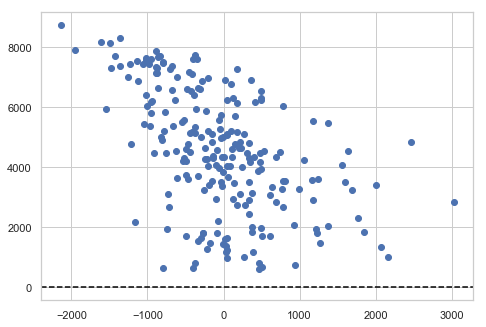

In [223]:
residuals  = predictions4-n_test
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.0, 1.0]) 
plt.scatter(residuals,n_test)
axes.axhline(color="black", ls="--") # This creates a horizon line (like abline in R)

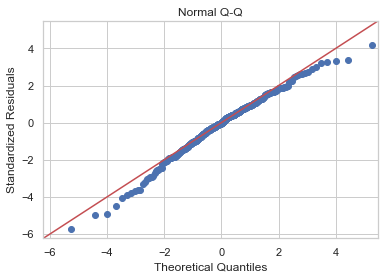

In [225]:
res = model4.resid
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals');
plt.show()

In [226]:

X = df.iloc[:,:-1].values # Matrix of features
y = df.iloc[:,11].values     # Response variable 

le = LabelEncoder()
c_cat = [0,1,2,3,4,5,6,7]
for i in c_cat:
    X[:,i] = le.fit_transform(X[:,i]).astype('str')

oh_en = OneHotEncoder()
X = oh_en.fit_transform(X).toarray()

# Avoiding the dummy variale trap
X = X[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

### Random Forest (Plain)

In [251]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 300, random_state=0)
regressor.fit(X_train,y_train)

pr_cnt = regressor.predict(X_test)


accuracy = 1-MAPE(y_test,pr_cnt)
print(format(round(accuracy*100 ,2))+' %')

78.65 %


### RF with cross validation

In [252]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= regressor, X= X_train, y = y_train, cv = 7)

# Mean absolute accuracy of random Forest regression with 10 folds cross validation
print(abs(accuracies).mean()*100)
print(abs(accuracies).std()*100)

77.47087339959737
4.486536607263327


## XGBoost

In [265]:
from xgboost import XGBRegressor


reg = XGBRegressor(learning_rate= .1, n_estimators= 100, objective='reg:linear', silent= True, nthread=1,gamma=.5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

accuracies = cross_val_score(estimator=reg,X=X_train,y=y_train, cv=10)
print(round(accuracies.mean()*100,2))
print(round(accuracies.std()*100,2))

78.04
6.1


In [245]:
feature_list = list(df.columns)
# Get numerical feature importances
importances = list(reg.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 40)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: dteday               Importance: 0.01123595517128706
Variable: weekday              Importance: 0.01123595517128706
Variable: workingday           Importance: 0.008025682531297207
Variable: yr                   Importance: 0.004815409425646067
Variable: holiday              Importance: 0.0032102728728204966
Variable: weathersit           Importance: 0.0032102728728204966
Variable: season               Importance: 0.0016051364364102483
Variable: mnth                 Importance: 0.0
Variable: avtemp               Importance: 0.0
Variable: hum                  Importance: 0.0
Variable: windspeed            Importance: 0.0
Variable: cnt                  Importance: 0.0
